In [122]:
include("DiscreteMaps.jl"); using DiscreteMaps; DM = DiscreteMaps;

In [123]:
using HDF5, JLD
L = load("/Users/johnwormell/DiscreteMaps-backup/results/rs-L2-2015-06-29T10-00-00--19-7-s.h5");

In [175]:
epsv = 3.8*(L["epsv"]+1)
rv = Array(Float64,3,length(epsv))
for i = 1:length(epsv)
    mu = DM.spectralacim(DM.logistic(epsv[i]),200,uselogisticcofn=true)
    for j = 1:3
        rv[j,i] = DM.totalint(mu,x->DM.logiA2[j]([x])[1])[1][1]
    end
end

In [125]:
using Gadfly

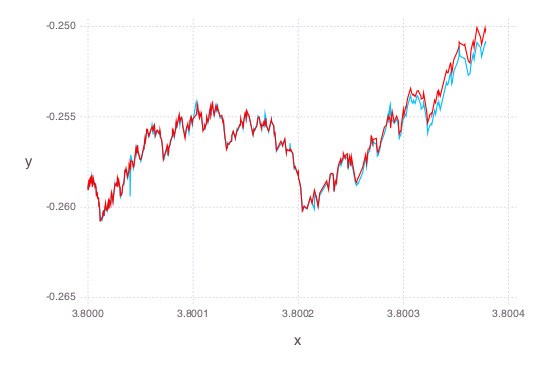

In [178]:
plot(
layer(x=epsv,y=L["eA"][2,:],Geom.line,Theme(default_color=color("red"))),
layer(x=epsv,y=rv[2,:],Geom.line)#,
#Scale.x_continuous(maxvalue=1e-4)
)

In [172]:
mu = DM.spectralacim(DM.logistic(3.8),uselogisticcofn=true,30)
(pgd,rds) = DM.plotmeasure(mu)
# mu2 = DM.spectralacim(DM.logistic(3.8),uselogisticcofn=false,200)
# (pgd2,rds2) = DM.plotmeasure(mu2)

([0.050045,0.050135,0.050225,0.050315,0.050405,0.050495,0.050585,0.050675,0.050765,0.050855  …  0.949145,0.949235,0.949325,0.949415,0.949505,0.949595,0.949685,0.949775,0.949865,0.949955],[0.0192703,0.0145863,-0.0104903,-0.016572,-0.00765426,0.00431082,0.0114496,0.0116646,0.0067189,-0.000177612  …  8.86096,9.3447,9.91405,10.6034,11.4639,12.5775,14.1069,16.2325,19.931,28.8682])

In [140]:
mean(sin(2*pi*pgd[2:end]).*rds)/1.1 |> println
DM.totalint(mu,x->sin(2*pi*x))

-0.26086866106024


(-0.25933236690381906,4.981908075684975e-9)

In [174]:
(mean(sin(2*pi*pgd[2:end]).*rds)/1.1, mean(sin(2*pi*pgd[2:end]).*rds2)/1.1) |> println
DM.totalint(mu,x->sin(2*pi*x)),
DM.totalint(mu2,x->sin(2*pi*x))

(-0.26035836172249494,-0.26035836016338787)


((-0.2588301641921471,5.7190662826514395e-9),(-0.25883016274473164,5.719092869573706e-9))

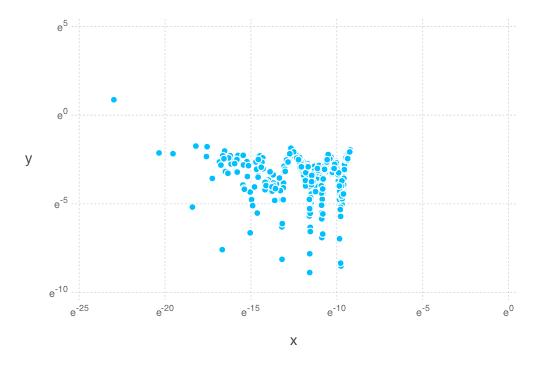

In [204]:
plot(x=L["epsv"],y=abs(L["eA"][1,:] .- mean(L["eA"][1,find(L["epsv"].<4e-8)],2))[:]./sqrt(L["epsv"]),Scale.y_log,Scale.x_log) # holder1/2!!!